# Make figures

To run this notebook, the GWP notebook must first be run (for the base case, and adjust drydep to 90 and 50 Tg/yr)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))
plt.rcParams['figure.dpi'] = 300

default_size = 18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=default_size)    # legend fontsize
plt.rc('figure', titlesize=default_size)

color_h2 = 'lightblue'
color_ch4 = 'lightseagreen'
color_h2o = 'darkviolet'
color_o3 = 'gold'
color_aerosol='brown'


model_dict = { 'OSLOCTM3':'OsloCTM',
               'WACCM6-2deg':'WACCM',
               'INCA':'INCA',
               'GFDL-emi':'GFDL-emi',
               'GFDL_nudge':'GFDL',
               'UKCA':'UKCA',
               'OSLOCTM3-emi':'OsloCTM-emi'}

sorted_array = ['GFDL','OsloCTM','INCA','UKCA','WACCM','GFDL-emi','OsloCTM-emi']

#For the RF per flux figures, use the same y-axis. 
ylim_rf_fig = 0.7


Bad key "text.kerning_factor" on line 4 in
/home/masan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
filepath= r"./output/"
df_drydep_max_table_per_flux = pd.read_csv(filepath+'drydep_90_table_per_flux_h2.csv',index_col=0)
df_drydep_max_table_per_flux.rename(model_dict, inplace=True)
df_drydep_min_table_per_flux = pd.read_csv(filepath+'drydep_50_table_per_flux_h2.csv',index_col=0)
df_drydep_min_table_per_flux.rename(model_dict, inplace=True)
df_table_per_flux = pd.read_csv(filepath+'table_per_flux_h2.csv',index_col=0)
df_feedback_factor = pd.read_csv(filepath+'feedback_factor_ch4.csv',index_col=0,header=None)




#Making modellist with shorter names
df_feedback_factor.rename(model_dict, inplace=True)

df_table_per_flux.rename(model_dict, inplace=True)
#df_table_per_flux = df_table_per_flux.sort_index()
df_table_per_flux=df_table_per_flux.reindex(sorted_array)
modellist = df_table_per_flux.index
df_table_per_flux

,deltaH2,surf_h2_per_h2_flux,surf_ch4_per_h2_flux,ch4_flux_per_h2_flux,ch4_rf_per_h2_flux,trop_du_ozone_per_h2_flux,strat_du_ozone_per_h2_flux,ozone_rf_per_h2_flux,h2o_rf_per_h2_flux,aerosol_rf_per_h2_flux
GFDL,30.5,6.98,1.14,0.26,0.44,4.09,-2.42,0.21,0.16,-0.00
OsloCTM,8.54,6.23,1.13,0.31,0.43,4.48,0.77,0.22,0.17,-0.03
INCA,7.23,7.36,1.13,0.29,0.43,3.93,-5.56,0.15,0.11,0.03
UKCA,6.87,7.80,1.33,0.38,0.51,4.63,nan,0.17,nan,nan
WACCM,9.93,5.36,1.19,0.33,0.46,3.31,-1.10,0.18,0.05,nan
GFDL-emi,197,6.96,1.00,0.21,0.39,7.97,5.23,0.39,0.25,-0.07
OsloCTM-emi,13.8,6.48,1.15,0.32,0.44,4.61,0.75,0.22,0.18,-0.03


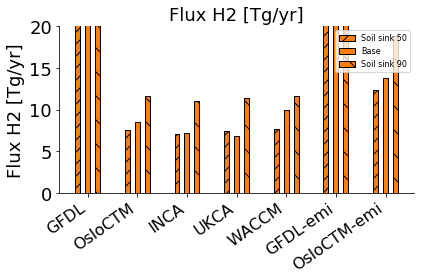

In [3]:
#df_table_per_flux.rename(model_dict, inplace=True)
##df_table_per_flux = df_table_per_flux.sort_index()
#df_table_per_flux=df_table_per_flux.reindex(sorted_array)
#modellist = df_table_per_flux.index
#df_table_per_flux
tittel = 'Flux H2 [Tg/yr]'
ytittel = 'Flux H2 [Tg/yr]'
df_flux = pd.concat([df_table_per_flux['deltaH2'],df_drydep_min_table_per_flux['deltaH2'],df_drydep_max_table_per_flux['deltaH2']],axis=1,sort=False)
df_flux.columns=['Base','Soil sink 50', 'Soil sink 90']
df_flux

plt.figure(figsize=(6,4))
for m,model in enumerate(df_flux.index):
    if m == 1:
        plt.bar(m-0.2,df_flux['Soil sink 50'].loc[model],edgecolor='black',width=0.1,hatch='//',color='C1',label='Soil sink 50')
        plt.bar(m,df_flux['Base'].loc[model],edgecolor='black',width=0.1,color='C1',label='Base')
        plt.bar(m+0.2,df_flux['Soil sink 90'].loc[model],edgecolor='black',width=0.1,hatch='\\', color='C1',label='Soil sink 90')
    else:
        plt.bar(m-0.2,df_flux['Soil sink 50'].loc[model],edgecolor='black',width=0.1,hatch='//',color='C1')
        plt.bar(m,df_flux['Base'].loc[model],edgecolor='black',width=0.1,color='C1')
        plt.bar(m+0.2,df_flux['Soil sink 90'].loc[model],edgecolor='black',width=0.1,hatch='\\', color='C1')
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
ax.set_ylim([0,20])
plt.legend(loc='upper right',fontsize=8)
#plt.tick_params(labelbottom = False, bottom = False)
ax.set_xticks(np.arange(0,len(df_flux.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()

## Surface H2 concentration by 1 Tg H2/yr

In [4]:
tittel = 'Surface H$_2$ per H$_2$ flux'
ytittel ='[ppb H$_2$/(Tg H$_2$ yr$^{-1}$)]'
field = 'surf_h2_per_h2_flux'
legend = False #False

In [5]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep_max_table_per_flux[field]
plot_values_min_dry = df_drydep_min_table_per_flux[field]

plot_values

GFDL          6.98
OsloCTM       6.23
INCA          7.36
UKCA          7.80
WACCM         5.36
GFDL-emi      6.96
OsloCTM-emi   6.48
Name: surf_h2_per_h2_flux, dtype: float64

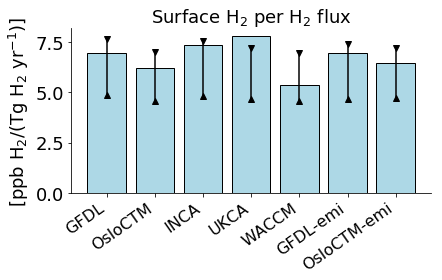

In [6]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):

    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_h2,label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
#plt.tick_params(labelbottom = False, bottom = False)
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Surface_H2_per_H2_flux.png', transparent=True)

## Methane flux by 1 Tg H2/yr

In [7]:
tittel = 'Methane flux per H$_2$ flux'
ytittel ='[Tg CH$_4$/Tg H$_2$]'
field = 'ch4_flux_per_h2_flux'
legend = False #False

In [8]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep_max_table_per_flux[field]
plot_values_min_dry = df_drydep_min_table_per_flux[field]

In [9]:
df_feedback_factor
feedback_factor = df_feedback_factor[1]
feedback_frac = 1.0 - (1.0/feedback_factor)
feedback_frac

0
GFDL-emi       nan
GFDL          0.29
INCA          0.27
OsloCTM       0.32
OsloCTM-emi    nan
UKCA          0.31
WACCM         0.36
Name: 1, dtype: float64

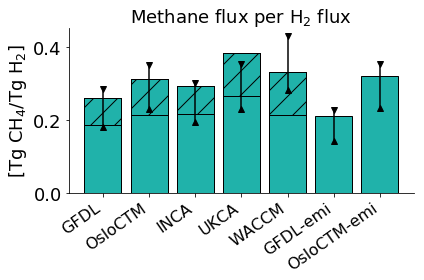

In [10]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_ch4,label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    #Hatch the feedback factor part
    plt.bar(m,plot_values.loc[model]*feedback_frac[model],bottom=plot_values.loc[model]*(1.0-feedback_frac[model]),fill=False,edgecolor='black',hatch='/')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/CH4_flux_per_H2_flux.png', transparent=True)

## Methane RF per flux

In [11]:
tittel = 'Methane RF per H$_2$ flux'
ytittel ='[mW m$^{-2}$/(Tg H$_2$ yr$^{-1}$)]'
field = 'ch4_rf_per_h2_flux'
legend = False


In [12]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep_max_table_per_flux[field]
plot_values_min_dry = df_drydep_min_table_per_flux[field]

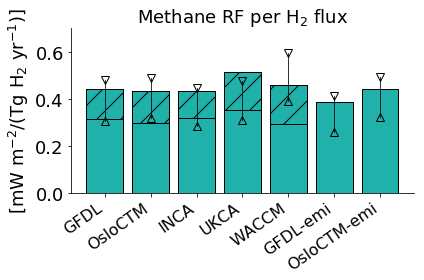

In [13]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):

    plt.bar(m,plot_values.loc[model],edgecolor='black',color=color_ch4,label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],linewidth=0.8,color='k')
    plt.plot(m,plot_values_max_dry.loc[model],fillstyle='none',markersize=8,marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],fillstyle='none',markersize=8,marker='v',color='black')
   
    
    #Hatch the feedback factor part
    plt.bar(m,plot_values.loc[model]*feedback_frac[model],bottom=plot_values.loc[model]*(1.0-feedback_frac[model]),fill=False,edgecolor='black',hatch='/')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)

plt.ylim(top=ylim_rf_fig)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/CH4_RF_per_H2_flux.png', transparent=True)

## Tropospheric ozone by H2 flux

In [14]:
tittel = 'Tropospheric ozone per H$_2$ flux'
ytittel ='[DU /(Tg H$_2$ yr$^{-1}$)]'
field = 'trop_du_ozone_per_h2_flux'
legend = False

For the following figures, add the methane induced effect

In [15]:
#Indirect effect via Methane.
df_drydep_max_table_per_flux_ch4 = pd.read_csv(filepath+'drydep_90_table_per_flux_ch4.csv',index_col=0)
df_drydep_max_table_per_flux_ch4.rename(model_dict, inplace=True)
df_drydep_min_table_per_flux_ch4 = pd.read_csv(filepath+'drydep_50_table_per_flux_ch4.csv',index_col=0)
df_drydep_min_table_per_flux_ch4.rename(model_dict, inplace=True)
df_table_per_flux_ch4 = pd.read_csv(filepath+'table_per_flux_ch4.csv',index_col=0)
df_table_per_flux_ch4.rename(model_dict, inplace=True)

In [16]:
field_ch4 = field.replace('h2_','ch4_')
print(field)
print(field_ch4)

trop_du_ozone_per_h2_flux
trop_du_ozone_per_ch4_flux


In [17]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep_max_table_per_flux[field]
plot_values_min_dry = df_drydep_min_table_per_flux[field]
plot_values
#print(plot_values_max_dry)
#print(plot_values_min_dry)

GFDL          4.09
OsloCTM       4.48
INCA          3.93
UKCA          4.63
WACCM         3.31
GFDL-emi      7.97
OsloCTM-emi   4.61
Name: trop_du_ozone_per_h2_flux, dtype: float64

In [18]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep_max_table_per_flux_ch4[field_ch4]*df_drydep_max_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep_min_table_per_flux_ch4[field_ch4]*df_drydep_min_table_per_flux['ch4_flux_per_h2_flux']


In [19]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_trop.txt'
df_ozone_du_trop = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
df_ozone_du_trop.index.name = None
df_ozone_du_trop.rename(columns=model_dict, inplace=True)

##This should be tropospheric ozone [DU] Divide by flux H2 directly
plot_values_ch4['GFDL-emi'] = (df_ozone_du_trop['GFDL-emi'].loc['10CH4'])/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = (df_ozone_du_trop['GFDL-emi'].loc['10CH4'])/df_drydep_max_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = (df_ozone_du_trop['GFDL-emi'].loc['10CH4'])/df_drydep_min_table_per_flux['deltaH2'].loc['GFDL-emi']


df_ozone_du_trop
plot_values_ch4['GFDL-emi']

0.007968126826797508

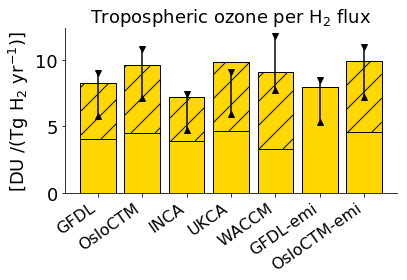

In [20]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_o3,color=color_o3,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_o3)
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Trop_Ozone_DU_per_H2_flux.png', transparent=True)

## Stratospheric ozone by H2 flux

In [21]:
tittel = 'Stratospheric ozone per H$_2$ flux'
ytittel ='[DU /(Tg H$_2$ yr$^{-1}$)]'
field = 'strat_du_ozone_per_h2_flux'
legend = False #False

In [22]:
field_ch4 = field.replace('h2_','ch4_')

In [23]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep_max_table_per_flux[field]
plot_values_min_dry = df_drydep_min_table_per_flux[field]

In [24]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep_max_table_per_flux_ch4[field_ch4]*df_drydep_max_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep_min_table_per_flux_ch4[field_ch4]*df_drydep_min_table_per_flux['ch4_flux_per_h2_flux']


In [25]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_strat.txt'
df_ozone_du_strat = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
df_ozone_du_strat.index.name = None
df_ozone_du_strat.rename(columns=model_dict, inplace=True)
##Divide by flux H2 directly
plot_values_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_drydep_max_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_drydep_min_table_per_flux['deltaH2'].loc['GFDL-emi']



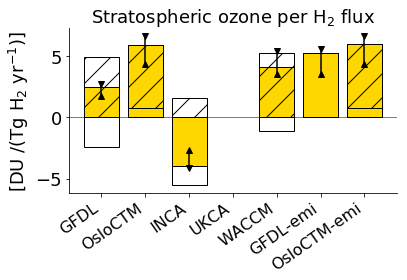

In [26]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=color_o3,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_o3)
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Strat_Ozone_DU_per_H2_flux.png', transparent=True)

## Ozone RF by 1 Tg H2

In [27]:
tittel = 'Ozone RF per H$_2$ flux'
ytittel ='[mW m$^{-2}$/(Tg H$_2$ yr$^{-1}$)]'
field = 'ozone_rf_per_h2_flux'
legend = False #False

In [28]:
field_ch4 = field.replace('h2_','ch4_')

In [29]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep_max_table_per_flux[field]
plot_values_min_dry = df_drydep_min_table_per_flux[field]

In [30]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep_max_table_per_flux_ch4[field_ch4]*df_drydep_max_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep_min_table_per_flux_ch4[field_ch4]*df_drydep_min_table_per_flux['ch4_flux_per_h2_flux']

In [31]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_rf.txt'
df_ozone_rf = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
df_ozone_rf.index.name = None
df_ozone_rf.rename(columns=model_dict, inplace=True)
#Divide by h2 flux directly
plot_values_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_drydep_max_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_drydep_min_table_per_flux['deltaH2'].loc['GFDL-emi']



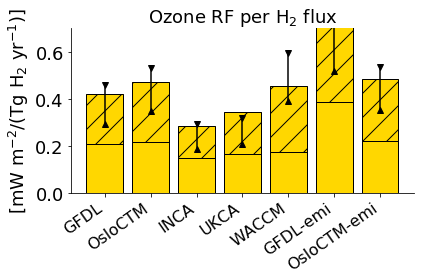

In [32]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):  
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_o3,color=color_o3,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_o3)
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
plt.ylim(top=ylim_rf_fig)

if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Ozone_RF_per_H2_flux.png', transparent=True)

## Strat. H2O RF by 1 Tg H2

In [33]:
tittel = 'Stratospheric H$_2$O RF per H$_2$ flux'
ytittel ='[mW m$^{-2}$/(Tg H$_2$ yr$^{-1}$)]'
field = 'h2o_rf_per_h2_flux'
legend = False

In [34]:
field_ch4 = field.replace('h2_','ch4_')

In [35]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep_max_table_per_flux[field]
plot_values_min_dry = df_drydep_min_table_per_flux[field]

In [36]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep_max_table_per_flux_ch4[field_ch4]*df_drydep_max_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep_min_table_per_flux_ch4[field_ch4]*df_drydep_min_table_per_flux['ch4_flux_per_h2_flux']

In [37]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'H2O_rf_gfdl.txt'
df_h2o_rf = pd.read_csv(inputpath+file, sep=',',index_col=0,header=0)

gfdl_emi_ch4 = df_h2o_rf.loc['H2+CH4 [mW m-2]'] - df_h2o_rf.loc['H2 [mW m-2]']

#gfdl_emi_ch4
plot_values_ch4['GFDL-emi'] = gfdl_emi_ch4/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = gfdl_emi_ch4/df_drydep_max_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = gfdl_emi_ch4/df_drydep_min_table_per_flux['deltaH2'].loc['GFDL-emi']


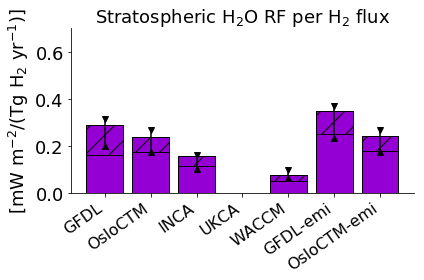

In [38]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_h2o,color=color_h2o,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_h2o)
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
plt.ylim(top=ylim_rf_fig)


if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/Strat_H2O_RF_per_H2_flux.png', transparent=True)

## Aerosol RF by 1 Tg H2

In [39]:
tittel = 'Aerosol RF per H$_2$ flux'
ytittel ='[mW m$^{-2}$/(Tg H$_2$ yr$^{-1}$)]'
field = 'aerosol_rf_per_h2_flux'
legend = False

In [40]:
field_ch4 = field.replace('h2_','ch4_')

In [41]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep_max_table_per_flux[field]
plot_values_min_dry = df_drydep_min_table_per_flux[field]
plot_values

GFDL          -0.00
OsloCTM       -0.03
INCA           0.03
UKCA            nan
WACCM           nan
GFDL-emi      -0.07
OsloCTM-emi   -0.03
Name: aerosol_rf_per_h2_flux, dtype: float64

In [42]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep_max_table_per_flux_ch4[field_ch4]*df_drydep_max_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep_min_table_per_flux_ch4[field_ch4]*df_drydep_min_table_per_flux['ch4_flux_per_h2_flux']

In [43]:
#GFDL: The nubers used include the methane induced effect. Set this value to zero and not nan.
#Add GFDL numbers:
inputpath = r"./input/"
file = 'aerosol_rf.txt'
df_aerosol_rf = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
df_aerosol_rf.index.name = None
df_aerosol_rf.rename(columns=model_dict, inplace=True)

plot_values['GFDL-emi']=df_aerosol_rf.loc['10CH4']['GFDL-emi']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry['GFDL-emi']=df_aerosol_rf.loc['10CH4']['GFDL-emi']/df_drydep_max_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry['GFDL-emi']=df_aerosol_rf.loc['10CH4']['GFDL-emi']/df_drydep_min_table_per_flux['deltaH2'].loc['GFDL-emi']

plot_values_ch4['GFDL-emi']=0.0
plot_values_max_dry_ch4['GFDL-emi']=0.0
plot_values_min_dry_ch4['GFDL-emi']=0.0

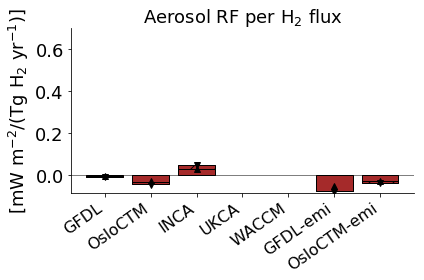

In [44]:
plt.figure(figsize=(6,4))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor=color_aerosol,color=color_aerosol,label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=color_aerosol)
  
    plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
plt.ylim(top=ylim_rf_fig)

if legend:
    plt.legend()
ax.set_xticks(np.arange(0,len(plot_values.index)))
ax.set_xticklabels(modellist, rotation=35,horizontalalignment="right")
plt.tight_layout()
plt.savefig('output/aerosol_RF_per_H2_flux.png', transparent=True)